In [9]:
import pandas as pd #pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np #data manipulation
import matplotlib.pyplot as plt #matplotlib is for drawing graphs
import matplotlib.colors as colors

Loading all the **scikit-learn** packages required for this project

In [11]:
from sklearn.utils import resample #downsample the dataset
from sklearn.model_selection import train_test_split #split dataset into training ad testing sets
from sklearn.preprocessing import scale #scale and center data
from sklearn.svm import SVC #this will make a support vector machine for classification
from sklearn.model_selection import GridSearchCV #this will do cross-validation
from sklearn.metrics import confusion_matrix #this creates a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay #draws a confusion matrix
from sklearn.decomposition import PCA #to perform PCA to plot the data

When `header=1` is set:
- It tells pandas to use the second row (index 1, since Python uses 0-based indexing) of the Excel file as the column headers
- The first row (index 0) will be skipped and not included in the resulting DataFrame
- This is useful when the Excel file has title information or other content in the first row, and the actual column names are in the second row

In [27]:
!pip install xlrd>=2.0.1

df = pd.read_excel('default of credit card clients.xls', header=1)

In [30]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The last column name '**default payment next month**' is very long. so, changing it to '**DEFAULT**'

In [38]:
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [46]:
df.drop('ID', axis = 1, inplace=True) #set axis=0 to remove rows and axis=1 to remove columns
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### **MISSING DATA HANDLING**

Seeing what kind of data is in each column

In [53]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

**Gender** (**category**)<br>
1 = male<br>
2 = female<br>
**Education** (**category**)<br>
1 = graduate school<br>
2 = university<br>
3 = high school<br>
4 = others<br>
**Marital status** (**category**)<br>
1 = married<br>
2 = single<br>
3 = others<br>
**Age** - year (**Integer**)<br>
**PAY_0 to PAY_6** - History of past payment.Tracked the past monthly payment records (from April to September, 2005)(**category**)<br>
PAY_0 - the repayment status in September 2005; PAY_1 - the repayment status in August 2005 and so on<br>
-1 = pay duly<br>
1 = payment delay for one month<br>
2 = payment delay for two months<br>
. . .<br>
8 = payment delay for eight months<br>
9 = payment delay for nine months and above<br>
**BILL_AMT1** = amount of bill statement in September, 2005; **BILL_AMT2** = amount of bill statement in August, 2005 and so on (**Integer**)<br>
**PAY_AMT1** = amount paid in September, 2005; **PAY_AMT2** = amount paid in August, 2005 and so on (**Integer**)<br>
**DEFAULT** - whether or not a person defaulted on the next payment (**category**)<br>
0=did not default<br>
1=defaulted<br>

In [68]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [70]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

so EDUACTION column has categories 0,5,6 in-addition to what we have. 0 could possibly mean missing data

In [73]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

MARRIAGE also has extra 0 category which could represent maybe missing data<br><br>
**NOTE**: let's treat 0 as missing data<br>

### **DEALING WITH MISSING DATA** 

Since scikit-learn’s support vector machines do not support datasets with missing values, we need to figure out what to do with the 0s in the dataset. We can either delete these customers from the training dataset, or impute values for the missing data. First let’s see how many rows contain missing values.

In [88]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

68

In [90]:
len(df)

30000

So 68 of the 30,000 rows, or less than 1%, contain missing values. Since that still leaves us with more data than we need for a Support Vector Machine, we’ll remove the rows with missing values, rather than try to impute their values. We do this by selecting all of the rows that do not contain 0 in either the EDUCATION or MARRIAGE columns.

In [94]:
df_no_missing = df.loc[(df['EDUCATION']!=0) & (df['MARRIAGE']!=0)]

In [96]:
len(df_no_missing)

29932

In [106]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [108]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

### **Downsample the data**

Support Vector Machines are great with small datasets, but not awesome with large ones, and this dataset, while not huge, is big enough to take a long time to optimize with Cross Validation. So we’ll downsample both categories, customers who did and did not default, to 1,000 eac<br><br>
29,932 samples is a relatively large number for a Support Vector Machine, so let’s downsample. To make sure we get 1,000 of each category, we start by splitting the data into two dataframes, one for people that did not default and one for people that did.h.

In [119]:
df_no_defaults = df_no_missing[df_no_missing['DEFAULT']==0]
df_defaults = df_no_missing[df_no_missing['DEFAULT']==1]

Now downsampling the dataset that did not default

In [122]:
df_no_defaults_downsampled = resample(df_no_defaults,
                                      replace=False,
                                      n_samples=1000,
                                      random_state=42)
len(df_no_defaults_downsampled)

1000

In [124]:
df_defaults_downsampled = resample(df_defaults,
                                      replace=False,
                                      n_samples=1000,
                                      random_state=42)
len(df_defaults_downsampled)

1000

 let's merge the two downsampled datasets into a single dataframe and print out the total number of samples.

In [127]:
df_downsampled=pd.concat([df_no_defaults_downsampled,df_defaults_downsampled])
len(df_downsampled)

2000

### **Format Data Part 1: Split the Data into Dependent and Independent Variables**

Now that we have taken care of the missing data, we are ready to start formatting the data for making a Support Vector Machine.

The first step is to split the data into two parts:

The columns of data that we will use to make classifications.

The column of data that we want to predict.

We will use the conventional notation of X (capital X) to represent the columns of data that we will use to make classifications and y (lower case y) to represent the thing we want to predict. In this case, we want to predict default (whether or not someone defaulted on a payment).

NOTE: The reason we deal with missing data before splitting it into X and y is that if we remove rows, splitting after ensures that each row in X correctly corresponds with the appropriate

ALSO NOTE: In the code below we are using copy() to copy the data by value. By default, pandas uses copy by reference. Using copy() ensures that the original data df_downsample is not modified when we modify X or y. In other words, if we make a mistake when we are formatting the columns for classification trees, we can just re-copy df_downsample, rather than reload the original data and remove the missing values etc. value in y.

In [163]:
X= df_downsampled.drop('DEFAULT',axis=1).copy  # alternatively: X = df_no_missing.iloc[:, :-1].copy
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [167]:
y=df_downsampled['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

Now that we have created X, which has the data we want to use to make predictions, and y, which has the data we want to predict, we are ready to continue formatting X so that it is suitable for making a **Support Vector Machine**

### **Format the Data Part 2 : One-Hot Encoding**
Now that we have split the data frame into two pieces, X, which contains the data we will use to make, or predict, classifications, and y, which contains the known classifications in our training dataset, we need to take a closer look at the variables in X.
SEX, EDUCATION, MARRIAGE and PAY_ are supposed to be categorical and need to be modified. This is because, while scikit learn Support Vector Machines natively support continuous data, like LIMIT_BAL and AGE, they do not natively support categorical data, like MARRIAGE, which contains 3 different categories. Thus, in order to use categorical data with scikit learn **Support Vector Machines**, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called **One-Hot Encoding**

At this point you may be wondering, "what's wrong with treating categorical data like continuous data?" To answer that question, let's look at an example: For the MARRIAGE column, we have 3 options:

Married

Single

Other

If we treated these values, 1, 2, and 3, like continuous data, then we would assume that 3, which means "Other", is more similar to 2, which means "Single", than it is to 1, which means "Married". That means the support vector machine would be more likely to cluster the people with 3s and 2s together than the people with 3s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a separate category that is no more or less similar to any of the other categories. Thus, the likelihood of clustering people with 3s with 2s is the same as clustering 3s with 1s, and that approach is more reasonable.

**NOTE:** There are many different ways to do **One-Hot Encoding** in Python. Two of the more popular methods are **ColumnTransformer()** (from scikit-learn) and **get_dummies()** (from pandas), and both methods have pros and cons. ColumnTransformer() has a very cool feature where it creates a persistent function that can validate data that you get in the future. For example, if you build your Support Vector Machine using a categorical variable favorite color that has red, blue and green options, then ColumnTransformer() can remember those options and late **Support Vector Machine** is being used in a production system, if someone says their favorite color is **orange**, then ColumnTransformer() can throw an error or handle the situation in some other nice way. The downside of ColumnTransformer() is that it turns your data into an array and looses all of the column names, making it harder to verify that your usage of ColumnTransformer() worked as you intended it to. In contrast, get_dummies() leaves your data in a dataframe and retains the column names, making it much easier to verify that it worked as intended. However, it does not have the persistent behavior that ColumnTransformer() has. So, for the sake of learning how One-Hot Encoding works, I prefer to use get_dummies(). However, once you are comfortable with One-Hot Encoding, I encourage you to investigate using ColumnTransformer().

First, before we commit to converting columns with One-Hot Encoding, let's just see what happens when we convert **MARRIAGE** without saving the result This will make it easy to see how get_dummies() works.s.r on when yourr on when yourr on when your when your

In [188]:
pd.get_dummies(X,columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,True,False,False
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,True,False,False
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,True,False,False
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,False,True,False
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,True,False,False


In [196]:
X_encoded = pd.get_dummies(X, columns = ['SEX',
                                         'MARRIAGE',
                                         'EDUCATION',
                                         'PAY_0',
                                         'PAY_2',
                                         'PAY_3',
                                         'PAY_4',
                                         'PAY_5',
                                         'PAY_6'])
X_encoded.head()                         

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,False,True,False,False,False,False,False,False,False,False
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,False,False,False,True,False,False,False,False,False,False
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,False,False,False,True,False,False,False,False,False,False
22974,210000,32,355,975,410,0,0,0,979,412,...,False,True,False,False,False,False,False,False,False,False
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,False,False,False,True,False,False,False,False,False,False


### **Format the Data Part 3: Centering and Scaling**
The **Radial Basis Function (RBF)** that we are using with our Support Vector Machine assumes that the data are centered and scaled. In other words, each column should have a mean value = 0 and a standard deviation = 1. 
So we need to do this to both the training and testing datasets.<br>
**NOTE:** We split the data into training and testing datasets and then scale them separately to avoid **Data Leakage**. Data Leakage occurs when information about the training dataset corrupts or influences the testing dataset.

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y , random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled= scale(X_test)

### **Build A Preliminary Support Vector Machine**
At long last, the data is correctly formatted for making a Support Vector Machine!!! So let's do it.

In [205]:
clf_svm =SVC(random_state =42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

OK, we've built a Support Vector Machine for classification. Let's see how it performs on the Testing Dataset and draw a **Confusion Matrix**.

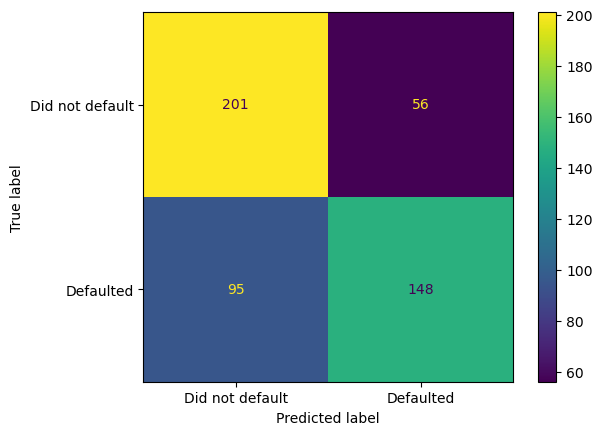

In [210]:
ConfusionMatrixDisplay.from_estimator(clf_svm,
                       X_test_scaled,
                       y_test,
                       values_format= 'd',
                       display_labels = ["Did not default", "Defaulted"])

In the confusion matrix, we see that of the 257 people that did not default, **201 (78%)** were correctly classified. And of the 243 people that defaulted, **148 (61%)** were correctly classified. So the Support Vector Machine was not awesome. So let's try to improve predictions using **Cross Validation** to optimize the parameters.

### **Optimize Parameters with Cross Validation and GridSearchCV()**
Optimizing a Support Vector Machine is all about finding the best value for **gamma**, and, potentially, the regularization parameter, **C**. So let's see if we can find better parameters values using cross validation in hope that we can improve the accuracy with the **Testing Dataset**.
Since we have two parameters to optimize, we will use GridSearchCV(). We specify a bunch of potential values for gamma and C, and GridSearchCV() tests all possible combinations of the parameters for us.

In [226]:
param_grid = {
    'C': [0.5, 1, 10, 100], # NOTE: Values for C must be > 0
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']},

## NOTE: We are including C=1 and gamma='scale'
## as possible choices since they are the default values.

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy', ## (accuracy is default scoring) Slightly improved, but hardly!!! C=1, gamma=1
    ##scoring='balanced_accuracy', ## Slightly improved, but hardly!!! C=100, gamma=0.001
    ##scoring='f1', ## Terrible!!! C=0.5, gamma=1
    ##scoring='f1_micro', ## Slightly improved, but hardly!!! C=100, gamma=0.001
    ##scoring='f1_macro', ## Same!! C=1, gamma='scale' (these are the same as default values)
    ##scoring='f1_weighted', ## Same!! C=1, gamma='scale' (these are the same as default values)
    ##scoring='roc_auc', ## Terrible!!! C=1, gamma=0.001
    ## For more scoring metrics see:
    ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
)

optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


And we see that the ideal value for C is **100**, which means we will use regularization, and the ideal value for gamma is **0.001**.

### **Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine**
Now that we have the ideal values for C and gamma we can build the final Support Vector Machine.

In [234]:
clf_svm = SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=100, gamma=0.001, random_state=42)

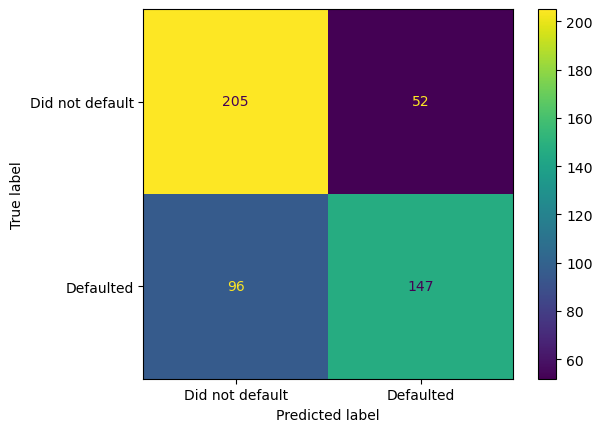

In [236]:
ConfusionMatrixDisplay.from_estimator(clf_svm,
                       X_test_scaled,
                       y_test,
                       values_format= 'd',
                       display_labels = ["Did not default", "Defaulted"])

And the results from the **optimized Support Vector Machine** are just a little bit better than before. 4 more people were correctly classified as not defaulting and only 1 more person was incorrectly classified as defaulting.<br>
In other words, the SVM was pretty good straight out of the box without much optimization. This makes SVMs a great, quick and dirty method for relatively small datasets.<br>

**NOTE:** Although classification with this dataset and an SVM is not awesome, it may be better than other methods. We'd have to compare to find out.
The last thing we are going to do is draw a support vector machine decision boundary and discuss how to interpret it.<br>

The first thing we need to do is count the number of columns in **X**:

In [243]:
len(df_downsampled.columns)

24

So we see that there are 24 features, or columns, in **X**. This is a problem because it would require a 24-dimensional graph, and one-dimension per feature used to make predictions. To plot the data in its raw form, we would need to we could just pick two features at random to use as x and y-axes on our graph, but instead, we will use **PCA (Principal Component Analysis)** to combine the 24 features into 2 orthogonal meta-features that we can use as axes for a graph. If you don't already know about PCA, don't sweat it. For now, just know that it is a way to shrink a 24-dimensional graph into a 2-dimensional graph.<br>

However, before we shrink the graph, let's first determine how accurate the shrunken graph will be. If it's relatively accurate, then it makes sense to draw the 2-Dimensional graph. If not, the shrunken graph will not be very useful. We can determine the accuracy of the graph by drawing something called a **scree plot**.

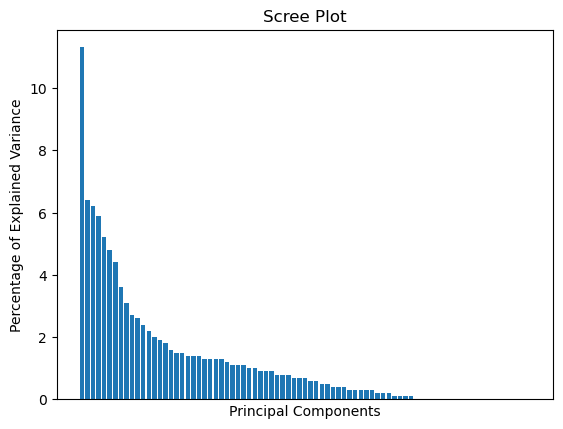

In [247]:
pca = PCA() # NOTE: By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',        # changes apply to the x-axis
    which='both',    # both major and minor ticks are affected
    bottom=False,    # ticks along the bottom edge are off
    top=False,       # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

The **scree plot** shows that the first principal component, PC1, accounts for a relatively large amount of variation in the raw data, and this means that it will be a good candidate for the x-axis in the 2-dimensional graph. However, PC2 is not much different from PC3 or PC4, which doesn't bode well for dimension reduction. Since we don't have a choice, let's go with it, but don't be surprised if the final graph looks funky.<br>
Now we will draw the PCA graph. <br>
First, let's optimize an SVM fit to PC1 and PC2.

In [250]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

## NOTE:
## PC1 contains the x-axis coordinates of the data after PCA
## PC2 contains the y-axis coordinates of the data after PCA

## Now center and scale the PCs...
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

## Now we optimize the SVM fit to the x and y-axis coordinates
## of the data after PCA dimension reduction...

param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']},

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy', # NOTE: The default value for scoring results in worse performance...
    ## For more scoring metrics see:
    ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


Now that we have the optimal values for C and gamma, lets draw the graph:

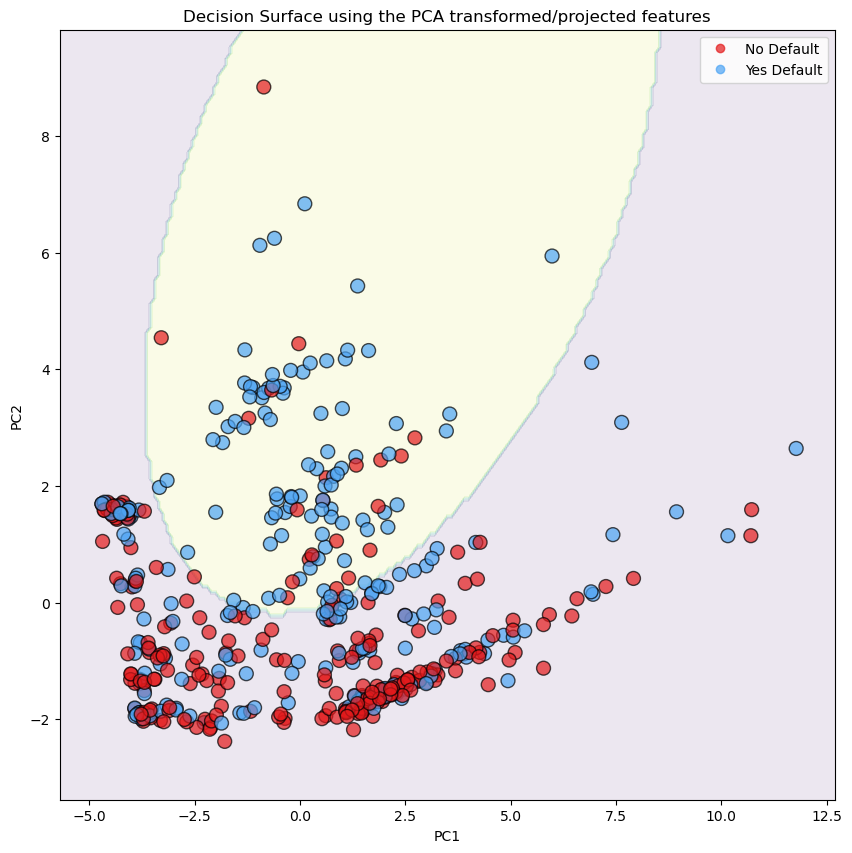

In [255]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)

## Transform the test dataset with the PCA...
X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

## Now create a matrix of points that we can use to show
## the decision regions.
## This matrix will be a little larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that
## matrix with the SVM. Points on one side of the
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications.
## The contours will be filled according to the
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4da4f4'])
## now draw the actual data points - these will
## be colored by their known (not predicted) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test,
                    cmap=cmap,
                    s=100,
                    edgecolors='k', ## 'k' = black
                    alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc="upper right")
legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision Surface using the PCA transformed/projected features')
# plt.savefig('svm_default.png')
plt.show()